# Distribuições

In [3]:
import numpy as np
import matplotlib. pyplot as plt

In [18]:
# Parâmetros da simulação
np.random.seed(42) # Para reprodutibilidade
n_simulacoes = 1000000  # Número de lançamentos

somas =[]

for rodada in range(n_simulacoes):
    # Simular os lançamentos dos dois dados
    dado1 = np.random.randint(1, 7, 1) # O segundo parâmetro (7), é para garantir que ele pegue o "6", pois ele exclui o número que está no parâmetro. O ultimo parâmetro é o número de resultados que eu quero.
    dado2 = np.random.randint(1, 7, 1)

    # Calcular a soma dos dois dados
    soma = dado1 + dado2
    somas.append(int(soma[0]))


In [ ]:
somas

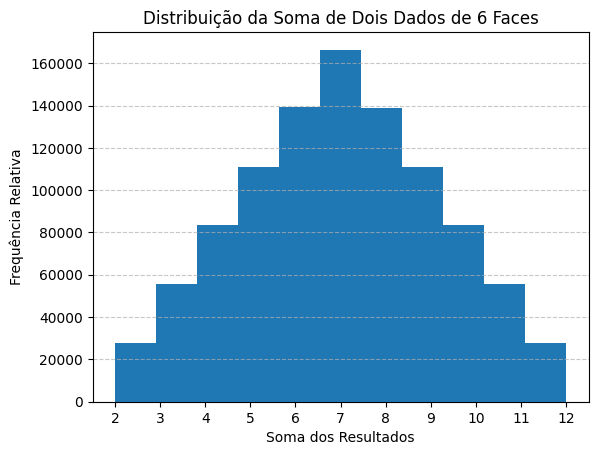

In [20]:
# Visualização
plt.hist(somas, bins=11)
plt.title("Distribuição da Soma de Dois Dados de 6 Faces")
plt.xlabel("Soma dos Resultados")
plt.ylabel("Frequência Relativa")
plt.xticks(range(2, 13))  # Valores possíveis para a soma (2 a 12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Probabilidades fornecidas para cada dia da semana
dias_da_semana = ["01. Segunda", "02. Terça", "03. Quarta", "04. Quinta", "05. Sexta", "06. Sábado", "07. Domingo"]
probabilidades = [0.10, 0.15, 0.20, 0.25, 0.20, 0.05, 0.05]

In [166]:
# 1. Simular 10,000 pedidos
np.random.seed(42)  # Para reprodutibilidade
n_pedidos = 10000
pedidos = np.random.choice(dias_da_semana, size=n_pedidos, p=probabilidades)

In [167]:
pedidos_df = pd.DataFrame({"pedidos": pedidos}).groupby("pedidos").size().sort_index()

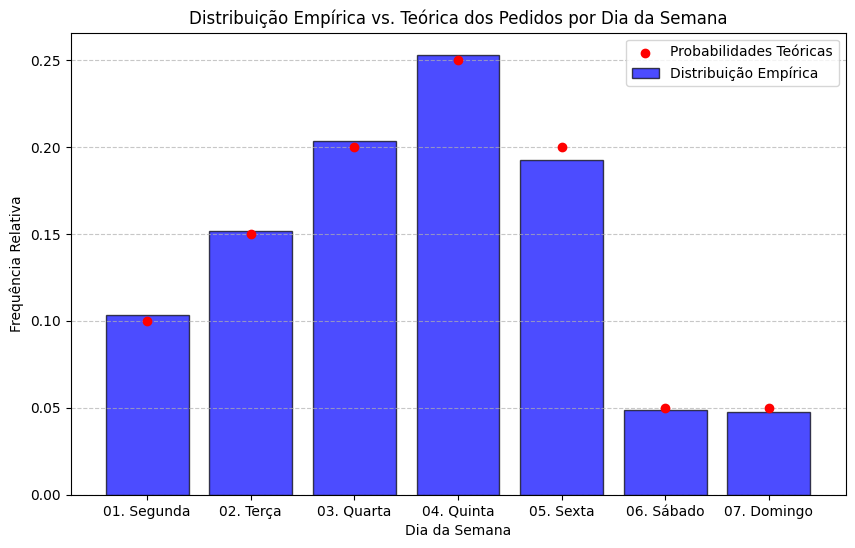

In [168]:
plt.figure(figsize=(10, 6))
plt.bar(pedidos_df.index, pedidos_df.values/len(pedidos), alpha=0.7, color='blue', edgecolor='black', label='Distribuição Empírica')
plt.scatter(dias_da_semana, probabilidades, color='red', label='Probabilidades Teóricas', zorder=5)
plt.title("Distribuição Empírica vs. Teórica dos Pedidos por Dia da Semana")
plt.xlabel("Dia da Semana")
plt.ylabel("Frequência Relativa")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [169]:
# 4. Comparação e Análise
print("Distribuição Empírica dos Pedidos por Dia da Semana:")
for dia, freq_emp, prob_teo in zip(dias_da_semana, pedidos_df/len(pedidos), probabilidades):
    print(f"{dia}: Empírica = {freq_emp:.3f}, Teórica = {prob_teo:.3f}")

print("\nA construção dessa distribuição empírica nos permite avaliar como os pedidos reais se comportam em relação às probabilidades esperadas.")

Distribuição Empírica dos Pedidos por Dia da Semana:
01. Segunda: Empírica = 0.103, Teórica = 0.100
02. Terça: Empírica = 0.152, Teórica = 0.150
03. Quarta: Empírica = 0.203, Teórica = 0.200
04. Quinta: Empírica = 0.253, Teórica = 0.250
05. Sexta: Empírica = 0.193, Teórica = 0.200
06. Sábado: Empírica = 0.049, Teórica = 0.050
07. Domingo: Empírica = 0.047, Teórica = 0.050

A construção dessa distribuição empírica nos permite avaliar como os pedidos reais se comportam em relação às probabilidades esperadas.


# Distribuições em Python

### Distribuição Normal

In [184]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros da distribuição
mu = 5  # Média
sigma = 1  # Desvio padrão

# Calcular a probabilidade de entrega em 6 dias ou menos
# Cumulative Distribution Function
probabilidade = norm.cdf(2, loc=mu, scale=sigma)

In [185]:
probabilidade

np.float64(0.001349898031630093)

In [180]:
# Visualização da distribuição
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, loc=mu, scale=sigma)

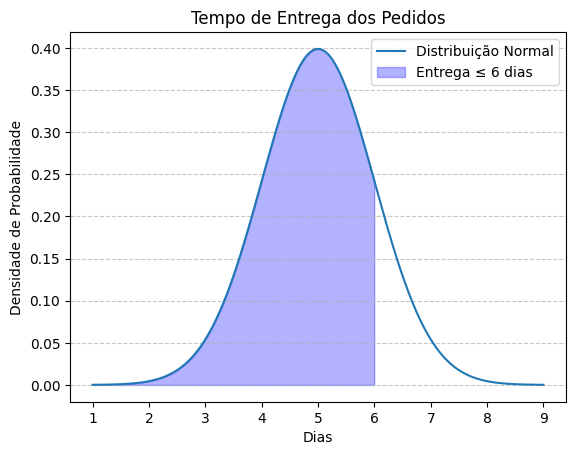

Probabilidade de entrega em 6 dias ou menos: 84.13%


In [183]:
plt.plot(x, y, label="Distribuição Normal")
plt.fill_between(x, 0, y, where=(x <= 6), color='blue', alpha=0.3, label="Entrega ≤ 6 dias")
plt.title("Tempo de Entrega dos Pedidos")
plt.xlabel("Dias")
plt.ylabel("Densidade de Probabilidade")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Probabilidade de entrega em 6 dias ou menos: {probabilidade:.2%}")

### Distribuição Binomial

In [187]:
from scipy.stats import binom

# Parâmetros da distribuição
n = 50  # Número de e-mails enviados
p = 0.2  # Probabilidade de abertura

# Calcular a probabilidade de exatamente 15 aberturas
k = 15
probabilidade = binom.pmf(k, n, p)

In [188]:
probabilidade

np.float64(0.029918656849901745)

In [189]:
# Visualização da distribuição
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p)

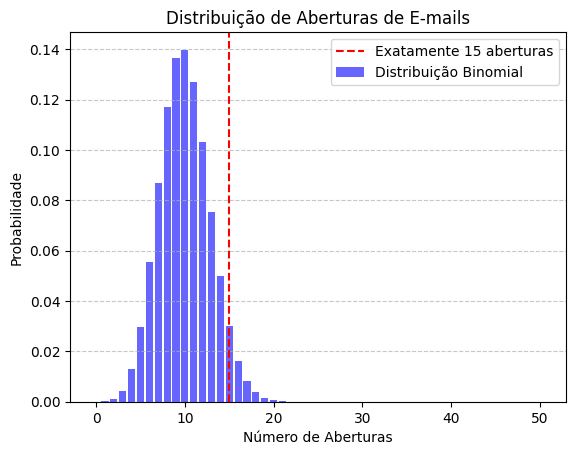

Probabilidade de exatamente 15 e-mails serem abertos: 2.99%


In [190]:
plt.bar(x, y, color='blue', alpha=0.6, label="Distribuição Binomial")
plt.axvline(k, color='red', linestyle='--', label=f"Exatamente {k} aberturas")
plt.title("Distribuição de Aberturas de E-mails")
plt.xlabel("Número de Aberturas")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Probabilidade de exatamente 15 e-mails serem abertos: {probabilidade:.2%}")

### Distribuição Poisson

In [195]:
from scipy.stats import poisson

# Parâmetros da distribuição
lambda_param = 10  # Taxa média de pedidos por hora

# Calcular a probabilidade de receber exatamente 15 pedidos
k = 11
probabilidade = poisson.pmf(k, lambda_param)

In [196]:
probabilidade

np.float64(0.11373639611012128)

In [193]:
# Visualização da distribuição
x = np.arange(0, 30)
y = poisson.pmf(x, lambda_param)

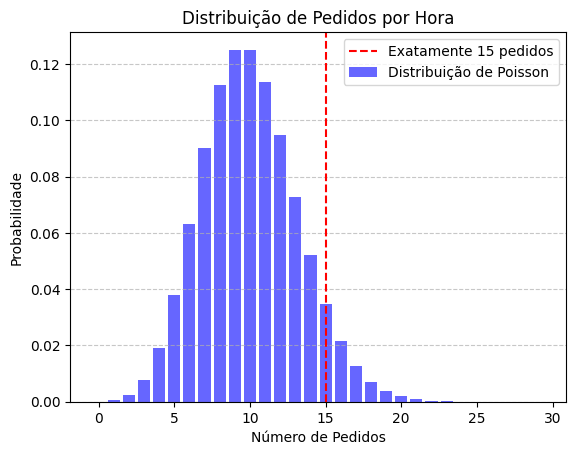

Probabilidade de receber exatamente 15 pedidos em uma hora: 3.47%


In [194]:
plt.bar(x, y, color='blue', alpha=0.6, label="Distribuição de Poisson")
plt.axvline(k, color='red', linestyle='--', label=f"Exatamente {k} pedidos")
plt.title("Distribuição de Pedidos por Hora")
plt.xlabel("Número de Pedidos")
plt.ylabel("Probabilidade")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Probabilidade de receber exatamente 15 pedidos em uma hora: {probabilidade:.2%}")

# Métodos de Amostragem

### amostragem Aleatória Simples

In [218]:
import pandas as pd
import numpy as np

# Métodos de Amostragem
base = pd.read_csv("./base_dados_distribuida.csv", sep=",", header=0)

In [219]:
base.head(5)

,ID,Idade,Estado
0,5be57106-6b6b-42ff-b0c0-63a508123d85,21,PR
1,940b65e3-46b7-4a69-91ca-c5c326ced4f5,50,SP
2,57bcf0af-8b4b-4c62-a080-f05875667103,75,PR
3,06a2f5c7-eeb7-4c95-8ffa-a14e68caa5e6,59,AM
4,6d6fd23a-3058-4ffe-a669-23620b2fa13b,38,SP


In [220]:
base.shape

(800000, 3)

In [229]:
populacao = base.copy()
amostra = populacao.sample(n=100, random_state=10)

print("Idade Média da População: ", np.mean(populacao["Idade"]))
print("Idade Média da Amostra: ", np.mean(amostra["Idade"]))

Idade Média da População:  44.01033
Idade Média da Amostra:  40.12


In [230]:
print("Quantidade de Estados: ", amostra["Estado"].nunique())

100*amostra["Estado"].value_counts() / len(amostra)

Quantidade de Estados:  22


Estado
SP    17.0
RS     8.0
MG     8.0
SC     7.0
CE     7.0
RJ     7.0
BA     7.0
PE     6.0
PR     5.0
DF     4.0
MA     4.0
PB     3.0
MT     3.0
PA     2.0
RN     2.0
PI     2.0
ES     2.0
GO     2.0
MS     1.0
SE     1.0
RO     1.0
AC     1.0
Name: count, dtype: float64

In [231]:
100*populacao["Estado"].value_counts() / len(populacao)

Estado
SP    21.893000
MG    10.075375
RJ     8.191500
BA     6.977750
PR     5.478250
RS     5.348125
PE     4.565750
CE     4.354125
PA     4.118250
MA     3.399125
SC     3.389375
GO     3.361750
ES     1.956375
AM     1.956000
PB     1.916750
RN     1.688625
MT     1.637375
AL     1.557250
PI     1.530125
DF     1.465125
MS     1.315250
SE     1.072000
RO     0.865000
TO     0.757750
AP     0.430250
AC     0.422250
RR     0.277500
Name: count, dtype: float64

### Amostragem Aleatória Estratificada

In [232]:
percentuais = populacao["Estado"].value_counts() / len(populacao)
percentuais

Estado
SP    0.218930
MG    0.100754
RJ    0.081915
BA    0.069778
PR    0.054782
RS    0.053481
PE    0.045657
CE    0.043541
PA    0.041182
MA    0.033991
SC    0.033894
GO    0.033618
ES    0.019564
AM    0.019560
PB    0.019168
RN    0.016886
MT    0.016374
AL    0.015572
PI    0.015301
DF    0.014651
MS    0.013152
SE    0.010720
RO    0.008650
TO    0.007578
AP    0.004302
AC    0.004222
RR    0.002775
Name: count, dtype: float64

In [234]:
estados = [estado for estado in percentuais.index]

In [236]:
estados

['SP',
 'MG',
 'RJ',
 'BA',
 'PR',
 'RS',
 'PE',
 'CE',
 'PA',
 'MA',
 'SC',
 'GO',
 'ES',
 'AM',
 'PB',
 'RN',
 'MT',
 'AL',
 'PI',
 'DF',
 'MS',
 'SE',
 'RO',
 'TO',
 'AP',
 'AC',
 'RR']

In [239]:
tamanho_amostra = 200
df_amostra = pd.DataFrame()

np.random.seed(10)

for estado in estados:
    percentual = percentuais[estado]
    qtd = np.round(percentual*tamanho_amostra, 0)

    if qtd == 0:
        print("Teve estado desconsiderado: ", estado)
        break

    pop_estado = populacao[populacao["Estado"] == estado]
    selecionado = pop_estado.sample(n=int(qtd))

    df_amostra = pd.concat([df_amostra, selecionado])

In [242]:
df_amostra["Estado"].value_counts()/len(df_amostra)

Estado
SP    0.217822
MG    0.099010
RJ    0.079208
BA    0.069307
PR    0.054455
RS    0.054455
PE    0.044554
CE    0.044554
PA    0.039604
MA    0.034653
SC    0.034653
GO    0.034653
PB    0.019802
AM    0.019802
ES    0.019802
RN    0.014851
MT    0.014851
AL    0.014851
PI    0.014851
DF    0.014851
MS    0.014851
SE    0.009901
RO    0.009901
TO    0.009901
AP    0.004950
AC    0.004950
RR    0.004950
Name: count, dtype: float64

# Distribuição Amostral

### Criando a população

In [310]:
# Simulando uma distribuição amostral com uma média de 1,65m e desvio padrão de 7cm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definr parâmetros
media = 1.65 # Média
desvio_padrao = 0.07 # Desvio Padrão
tamanho = 1000 # Número de Amostras

# Gerar valores seguindo uma distribuição normal
populacao = np.random.normal(loc=media, scale=desvio_padrao, size=tamanho)

# Exibir as primeiras amostras
print(populacao[:10])

[1.62387553 1.55057583 1.62211234 1.71303273 1.75470388 1.72235917
 1.63625033 1.77243549 1.71867981 1.57220224]


In [311]:
media = np.mean(populacao)
media

np.float64(1.6502779918880879)

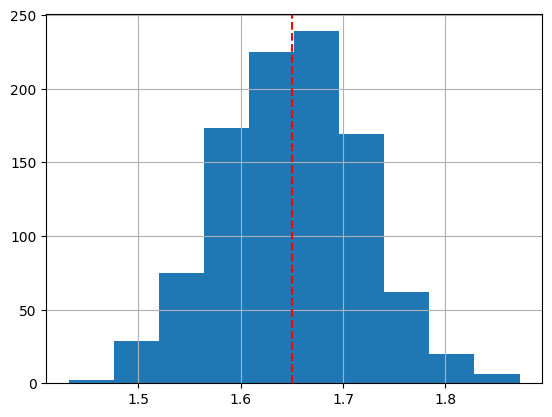

In [312]:
# Colocando resultado em um dataframe pandas
populacao_df = pd.DataFrame({"alturas": populacao})

# Desenhando um histograma
populacao_df["alturas"].hist()
plt.axvline(media, linestyle="dashed", color="red")

### Simulando a Distribuição Amostral

In [317]:
tamanho_amostra = 50
num_amostras = 1000

medias_amostrais = []

for n in range(num_amostras):
    amostra = np.random.choice(populacao, tamanho_amostra, replace=False)
    media_amostral = np.mean(amostra)

    medias_amostrais.append(media_amostral)

medias_amostrais[:10]

[np.float64(1.6502259780819515),
 np.float64(1.646829675651525),
 np.float64(1.6380874358019113),
 np.float64(1.6396896451946679),
 np.float64(1.6619240443312324),
 np.float64(1.6544300263941008),
 np.float64(1.646736047421688),
 np.float64(1.6517081006113923),
 np.float64(1.6548206990600165),
 np.float64(1.6592782050990462)]

Média Populacional:  1.6502779918880879
Média das Médias Amostrais:  1.6501639986963161


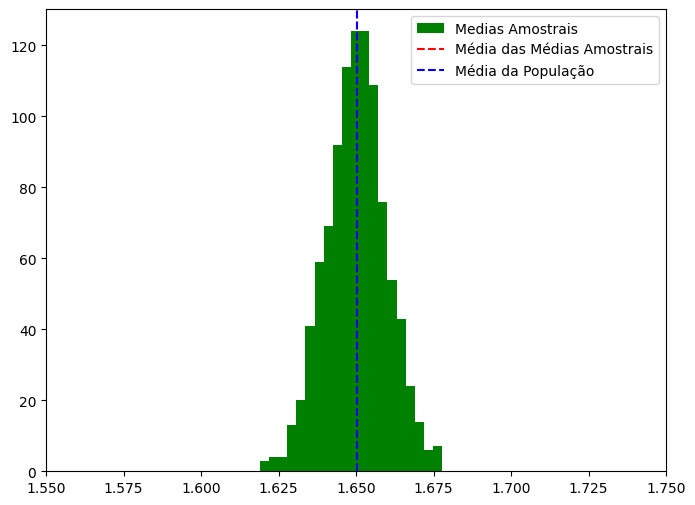

In [318]:
plt.figure(figsize=(8,6))

print("Média Populacional: ", media)
print("Média das Médias Amostrais: ", np.mean(medias_amostrais))

# Plotar as medias amostrais
plt.hist(medias_amostrais, bins=20, color="green", label="Medias Amostrais")

plt.xlim((1.55, 1.75))

# Linha Indicando Media da Distribuição Amostral
plt.axvline(np.mean(medias_amostrais), linestyle="dashed", color="red", label="Média das Médias Amostrais")

# Linha Indicando a Média Populacional
plt.axvline(media, linestyle="dashed", color="blue", label="Média da População")

# Colocar legenda
plt.legend()

In [319]:
# Qual a probabilidade de selecionar uma amostra de tamanho 5 com média maior ou igual a 1.7?

100 * np.sum(np.array(medias_amostrais) >= 1.7) / len(medias_amostrais)

np.float64(0.0)

# Tamanho de Amostra

In [320]:
import numpy as np

# Parâmetros da população
populacao = np.random.normal(loc=100, scale=15, size=10000)  # Exemplo de população
media_populacional = np.mean(populacao)  # Valor verdadeiro da média populacional
erro_permitido = 2  # Erro máximo permitido

# Função para calcular o tamanho amostral
def calcular_tamanho_amostral(populacao, media_populacional, erro_permitido, max_tamanho=500):
    np.random.seed(42)
    tamanho = 10  # Começa com tamanho pequeno

    while tamanho <= max_tamanho:
        # Simular várias amostras
        amostras = [np.mean(np.random.choice(populacao, tamanho, replace=False)) for _ in range(1000)]

        # Calcular o erro médio
        erro_obtido = np.std(amostras) * 2

        # Verificar se o erro obtido está dentro do erro permitido
        if erro_obtido <= erro_permitido:
            return tamanho

        tamanho += 1

    return None  # Retorna None se não encontrar o tamanho dentro do limite máximo

# Calcular o tamanho amostral necessário
tamanho_necessario = calcular_tamanho_amostral(populacao, media_populacional, erro_permitido)

if tamanho_necessario:
    print(f"O tamanho amostral necessário é: {tamanho_necessario}")
else:
    print("Não foi possível encontrar um tamanho amostral dentro do limite máximo definido.")


O tamanho amostral necessário é: 205


# Tamanho Amostra versus Risco

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parâmetros do cenário
p_base = 0.10   # Conversão baseline
p_new = 0.06    # Conversão esperada da nova funcionalidade
revenue_per_conversion = 1500  # Receita por conversão (R$)

In [440]:
# Faixa de tamanhos de amostra
n_list = [100, 200, 300, 500, 1000, 2000, 5000]
# Número de simulações para cada n
num_simulations = 1000

# Listas para armazenar resultados
results = {
    'n': [],
    'avg_standard_error': [],
    'avg_loss': []
}

In [441]:
np.random.seed(42)  # Reprodutibilidade

for n in n_list:
    se_list = []
    loss_list = []
    
    for _ in range(num_simulations):
        # Gera dados de conversão (Bernoulli com p = p_new)
        conversions = np.random.binomial(1, p_new, n)
        
        # Taxa de conversão observada na amostra
        p_hat = np.mean(conversions)
        
        # Erro padrão (aprox.) da taxa de conversão
        se = np.std(conversions)/np.sqrt(n)
        
        se_list.append(se)
        
        # Perda de receita na amostra:
        # baseline = n * p_base * revenue_per_conversion
        # new = n * p_hat * revenue_per_conversion
        # loss = baseline - new
        loss = (p_base - p_hat) * n * revenue_per_conversion
        loss_list.append(loss)
    
    # Calcula as médias ao longo das simulações
    avg_se = np.mean(se_list)
    avg_loss = np.mean(loss_list)
    
    # Armazena nos resultados
    results['n'].append(n)
    results['avg_standard_error'].append(avg_se)
    results['avg_loss'].append(avg_loss)


In [442]:
# Converte resultados em DataFrame
df_results = pd.DataFrame(results)
print(df_results)

      n  avg_standard_error  avg_loss
0   100            0.022920    6201.0
1   200            0.016652   11863.5
2   300            0.013653   17820.0
3   500            0.010630   29461.5
4  1000            0.007490   60057.0
5  2000            0.005314  119317.5
6  5000            0.003356  300262.5


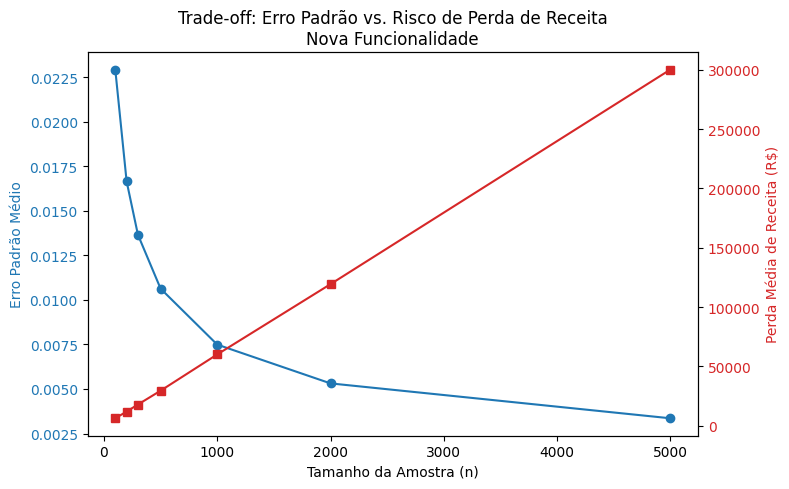

In [443]:
# Visualização
fig, ax1 = plt.subplots(figsize=(8, 5))

color1 = 'tab:blue'
ax1.set_xlabel('Tamanho da Amostra (n)')
ax1.set_ylabel('Erro Padrão Médio', color=color1)
ax1.plot(df_results['n'], df_results['avg_standard_error'], marker='o', color=color1, label='Erro Padrão')
ax1.tick_params(axis='y', labelcolor=color1)

# Cria um segundo eixo Y para a perda de receita
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.set_ylabel('Perda Média de Receita (R$)', color=color2)
ax2.plot(df_results['n'], df_results['avg_loss'], marker='s', color=color2, label='Perda de Receita')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Trade-off: Erro Padrão vs. Risco de Perda de Receita\nNova Funcionalidade')
fig.tight_layout()
plt.show()

# Estimação da Média

In [ ]:
# Criar população com distribuição uniforme
populacao = np.random.normal(100, 10, 100000)
media_populacao = np.mean(populacao)

# Tamanhos de amostra diferentes
tamanhos_amostra = [5, 30, 100]

plt.figure(figsize=(12, 8))

for i, n in enumerate(tamanhos_amostra):
    # Simular a distribuição amostral para cada tamanho de amostra
    medias_amostrais = [
        np.mean(np.random.choice(populacao, n, replace=False))
        for _ in range(num_amostras)
    ]

    # Plotar a distribuição amostral
    plt.subplot(3, 1, i + 1)
    plt.xlim((80, 120))
    plt.axvline(media_populacao, linestyle="dashed", color="blue")
    plt.axvline(np.mean(medias_amostrais), linestyle="dashed", color="red")
    plt.hist(medias_amostrais, bins=30, density=True, alpha=0.7, color='green')
    plt.title(f"Distribuição Amostral (n={n})")
    plt.xlabel("Média Amostral")
    plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

# Estimação da Variância

In [327]:
import numpy as np

# Configuração da população
np.random.seed(42)
populacao = np.random.normal(loc=50, scale=10, size=10000)  # População com média 50 e desvio padrão 10

# Função para estimar variância (com viés e sem viés)
def estimar_variancia(amostra):
    variancia_viesada = np.var(amostra, ddof=0)  # Divisão por n
    variancia_nao_viesada = np.var(amostra, ddof=1)  # Divisão por (n-1)
    return variancia_viesada, variancia_nao_viesada

n_simulacoes = 1000

variancia_viesada = []
variancia_nao_viesada = []

In [330]:
# Tamaho 10
tamanho = 10
for _ in range(n_simulacoes):
    amostra = np.random.choice(populacao, size=tamanho, replace=False)
    var_viesada, var_nao_viesada = estimar_variancia(amostra)
    variancia_viesada.append(var_viesada)
    variancia_nao_viesada.append(var_nao_viesada)


print("\nTamanho amostral: ", tamanho)
print("Desvio Padrão Populacional: ", np.std(populacao))
print("Desvio Padrão Viesado: ", np.mean(np.sqrt(variancia_viesada)))
print("Desvio Padrão Não Viesado: ", np.mean(np.sqrt(variancia_nao_viesada)))


Tamanho amostral:  10
Desvio Padrão Populacional:  10.034122061299875
Desvio Padrão Viesado:  9.558137002898535
Desvio Padrão Não Viesado:  9.897767021319561


In [332]:
# Tamaho 500
tamanho = 1000
for _ in range(n_simulacoes):
    amostra = np.random.choice(populacao, size=tamanho, replace=False)
    var_viesada, var_nao_viesada = estimar_variancia(amostra)
    variancia_viesada.append(var_viesada)
    variancia_nao_viesada.append(var_nao_viesada)


print("\nTamanho amostral: ", tamanho)
print("Desvio Padrão Populacional: ", np.std(populacao))
print("Desvio Padrão Viesado: ", np.mean(np.sqrt(variancia_viesada)))
print("Desvio Padrão Não Viesado: ", np.mean(np.sqrt(variancia_nao_viesada)))


Tamanho amostral:  1000
Desvio Padrão Populacional:  10.034122061299875
Desvio Padrão Viesado:  9.748123283654321
Desvio Padrão Não Viesado:  9.95491506968029


# Intervalos de Confiança

In [356]:
import numpy as np
import matplotlib.pyplot as plt

# Configuração da população
np.random.seed(42)
populacao = np.random.binomial(100, 0.2, size=10000)  # População com média 50 e desvio padrão 10
media_populacional = np.mean(populacao)

# Simular intervalos de confiança
tamanho_amostra = 100
n_simulacoes = 20
ics = []

In [357]:
for _ in range(n_simulacoes):
    # Obter amostra
    amostra = np.random.choice(populacao, size=tamanho_amostra, replace=False)
    media_amostra = np.mean(amostra)
    erro_padrao = np.std(amostra, ddof=1) / np.sqrt(tamanho_amostra)

    ic_inferior = media_amostra - 2 * erro_padrao
    ic_superior = media_amostra + 2 * erro_padrao
    
    print(f"Média: {np.round(media_amostra, 0)} | IC: [{ic_inferior} - {ic_superior}]")

    ics.append((media_amostra, ic_inferior, ic_superior))

Média: 20.0 | IC: [19.426084965803255 - 20.933915034196744]
Média: 20.0 | IC: [19.307624658310512 - 20.832375341689488]
Média: 20.0 | IC: [19.2804330120397 - 20.9595669879603]
Média: 19.0 | IC: [18.557384551639544 - 20.222615448360457]
Média: 20.0 | IC: [19.520744817792213 - 21.059255182207785]
Média: 20.0 | IC: [19.04898260548955 - 20.57101739451045]
Média: 20.0 | IC: [19.34866895574803 - 20.83133104425197]
Média: 21.0 | IC: [19.761398430309566 - 21.498601569690432]
Média: 20.0 | IC: [19.698708671826125 - 21.121291328173875]
Média: 20.0 | IC: [18.861242672087727 - 20.198757327912276]
Média: 20.0 | IC: [19.441220420381654 - 21.07877957961835]
Média: 20.0 | IC: [18.991362217683754 - 20.52863778231625]
Média: 21.0 | IC: [19.811856494888847 - 21.34814350511115]
Média: 20.0 | IC: [19.154249163826982 - 20.62575083617302]
Média: 20.0 | IC: [18.948149415137774 - 20.591850584862225]
Média: 20.0 | IC: [18.789383823704817 - 20.450616176295185]
Média: 19.0 | IC: [18.470073235675397 - 20.069926764

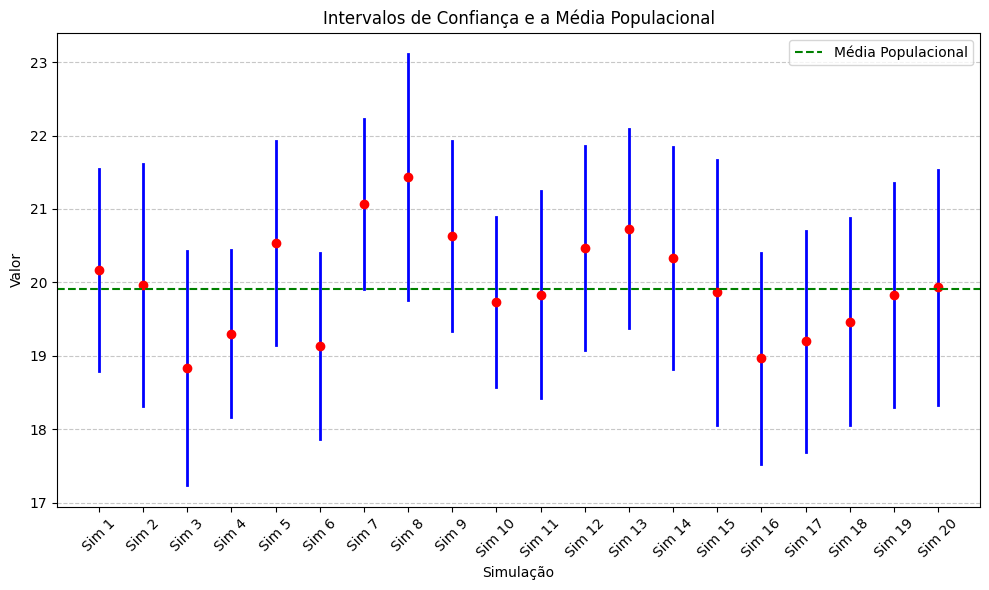

In [353]:
# Visualizar intervalos de confiança
plt.figure(figsize=(10, 6))
for i, (media, ic_min, ic_max) in enumerate(ics):
    # Barras verticais para os ICs
    plt.plot([i, i], [ic_min, ic_max], color='blue', lw=2)
    # Ponto para a média da amostra
    plt.plot(i, media, 'o', color='red')

# Linha horizontal representando a média populacional
plt.axhline(media_populacional, color='green', linestyle='--', label="Média Populacional")

# Ajustar gráfico
plt.title("Intervalos de Confiança e a Média Populacional")
plt.xlabel("Simulação")
plt.ylabel("Valor")
plt.xticks(range(n_simulacoes), labels=[f"Sim {i+1}" for i in range(n_simulacoes)], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Controles Fabricados

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import pairwise_distances

# Simulação de dados
np.random.seed(42)
n = 500
data = pd.DataFrame({
    "renda": np.random.normal(5000, 1000, n),
    "idade": np.random.normal(35, 5, n),
    "tratamento": np.random.choice([0, 1], size=n, p=[0.7, 0.3]),
})

# Impacto do tratamento no gasto
data["gasto"] = 1000 + 0.5 * data["renda"] + 2 * data["idade"] + \
                300 * data["tratamento"] + np.random.normal(0, 200, n)

In [369]:
data[data["tratamento"]==0]

,renda,idade,tratamento,gasto
0,5496.714153,39.630888,0,3754.554542
1,4861.735699,44.547083,0,3556.898077
2,5647.688538,28.007162,0,3610.433335
4,4765.846625,31.746787,0,3686.499669
6,6579.212816,32.038030,0,4144.300272
...,...,...,...,...
494,6523.124077,29.991900,0,4226.777969
496,3962.753846,43.988433,0,3178.610638
497,4809.661322,38.204214,0,3482.523544
498,4124.381747,32.144105,0,3039.201905


In [370]:
# Cálculo do propensity score
X = data[["renda", "idade"]]
y = data["tratamento"]
log_reg = LogisticRegression()
log_reg.fit(X, y)
data["propensity_score"] = log_reg.predict_proba(X)[:, 1]

In [371]:
data

,renda,idade,tratamento,gasto,propensity_score
0,5496.714153,39.630888,0,3754.554542,0.285380
1,4861.735699,44.547083,0,3556.898077,0.274123
2,5647.688538,28.007162,0,3610.433335,0.305294
3,6523.029856,37.814846,1,4442.821813,0.294018
4,4765.846625,31.746787,0,3686.499669,0.294118
...,...,...,...,...,...
495,5538.910044,33.594499,1,4133.753565,0.295421
496,3962.753846,43.988433,0,3178.610638,0.270196
497,4809.661322,38.204214,0,3482.523544,0.283900
498,4124.381747,32.144105,0,3039.201905,0.289896


In [372]:
# Matching baseado no propensity score
treated = data[data["tratamento"] == 1]
control = data[data["tratamento"] == 0]
distances = pairwise_distances(treated["propensity_score"].values.reshape(-1, 1),
                               control["propensity_score"].values.reshape(-1, 1))
matched_indices = distances.argmin(axis=1)
matched_control = control.iloc[matched_indices]

In [373]:
# Comparando resultados
matched_data = pd.concat([treated.reset_index(), matched_control.reset_index()], axis=0)

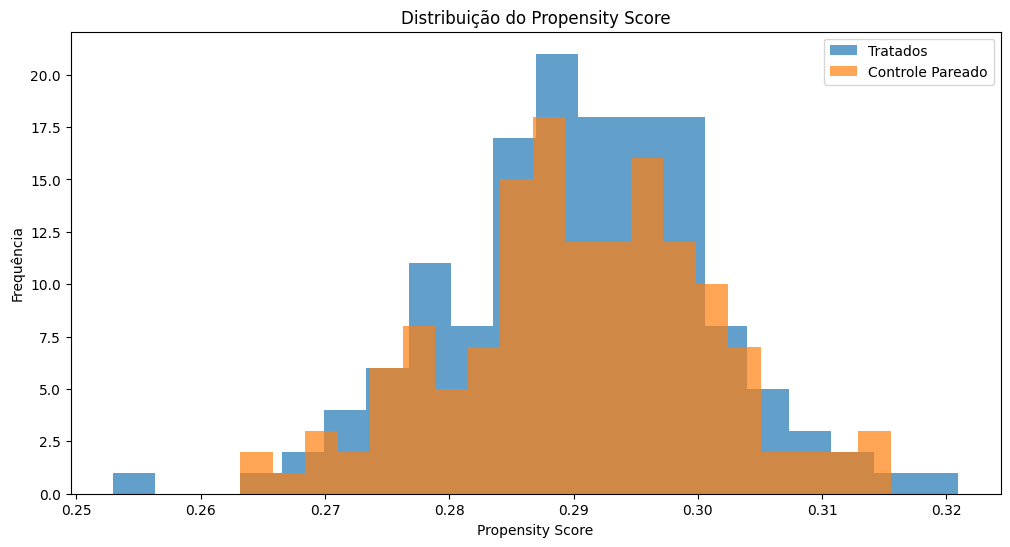

Impacto estimado do tratamento: 289.97


In [374]:
# Visualização
plt.figure(figsize=(12, 6))
plt.hist(data.loc[data["tratamento"] == 1, "propensity_score"], bins=20, alpha=0.7, label="Tratados")
#plt.hist(data.loc[data["tratamento"] == 0, "propensity_score"], bins=20, alpha=0.7, label="Controle Original")
plt.hist(matched_control["propensity_score"], bins=20, alpha=0.7, label="Controle Pareado")
plt.title("Distribuição do Propensity Score")
plt.xlabel("Propensity Score")
plt.ylabel("Frequência")
plt.legend()
plt.show()

# Resultado do impacto
tratados_mean = treated["gasto"].mean()
controle_mean = matched_control["gasto"].mean()
print(f"Impacto estimado do tratamento: {tratados_mean - controle_mean:.2f}")

# Permutação

In [404]:
import numpy as np
import matplotlib.pyplot as plt

# Dados simulados
np.random.seed(42)
grupo1 = np.random.normal(50, 10, 10000)  # Vendas no publico geral caso não haja campanha
grupo2 = np.random.normal(55, 10, 10000)  # Vendas no publico geral caso haja campanha

/var/folders/ng/rp490629717790w76dhtph840000gn/T/ipykernel_92929/3815161492.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


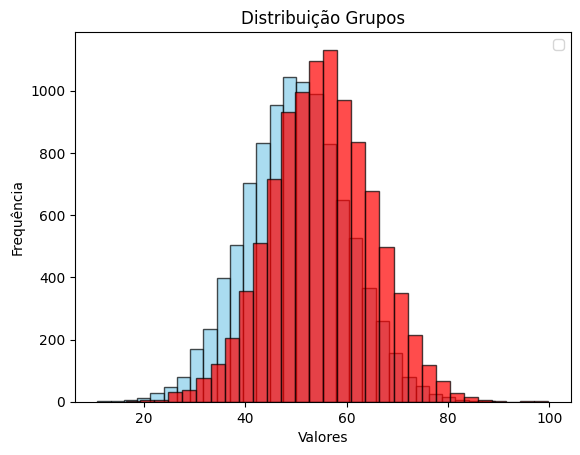

In [405]:
plt.hist(grupo1, bins=30, alpha=0.7, color="skyblue", edgecolor="black")
plt.hist(grupo2, bins=30, alpha=0.7, color="red", edgecolor="black")
plt.title("Distribuição Grupos")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.legend()
plt.show()

In [431]:
tamanho_amostra = 300

controle = np.random.choice(grupo1, size=tamanho_amostra, replace=False)
tratamento = np.random.choice(grupo2, size=tamanho_amostra, replace=False)

# Hipóteses
# Hipótese nula = não há diferença entre os dois grupos
# Hpótese Alternativa = há diferença de compra entre os dois públicos

# Diferença observada entre as médias
dif_observada = np.mean(tratamento) - np.mean(controle)

In [432]:
dif_observada

np.float64(4.6854540979811645)

In [408]:
np.concatenate([controle, tratamento])

array([48.27370866, 42.39636359, 38.79952578, 51.39028687, 60.01046093,
       26.15693211, 48.0192637 , 48.55095421, 58.97066197, 48.31699577,
       60.54620628, 58.93697689, 54.09140923, 48.6225894 , 45.71345473,
       41.6163812 , 58.91343902, 62.17959152, 63.52202679, 45.7075558 ,
       56.95863839, 77.55217744, 46.92428583, 51.35190341, 62.85582234,
       34.16097177, 47.02436497, 42.40326982, 61.00959635, 38.75878141,
       42.38412135, 53.77263259, 40.11408893, 62.18761852, 39.22279254,
       43.59845543, 59.22977565, 52.52568846, 61.39555536, 49.69213498,
       42.46137886, 68.97767017, 53.68673309, 43.41617282, 61.78865937,
       54.36235705, 41.31739038, 54.25910967, 70.48708258, 39.07836367,
       66.24678458, 52.56170606, 64.90137522, 38.46293676, 51.9484234 ,
       58.29474842, 50.8520945 , 45.3614557 , 31.58102227, 59.94447376,
       64.53275476, 44.2101578 , 35.76041888, 40.17675728, 53.07299521,
       55.21279905, 62.53132825, 58.82333062, 63.05478807, 59.78

In [409]:
combinados = np.concatenate([controle, tratamento])

In [418]:
np.random.shuffle(combinados)

In [419]:
combinados

array([49.64754296, 47.54379533, 61.39555536, 40.17523485, 51.35190341,
       50.8520945 , 31.58102227, 47.03709811, 46.23247769, 62.53132825,
       64.75112364, 64.51277389, 40.17926725, 66.28396623, 57.91658933,
       45.42072161, 53.68673309, 73.90729849, 45.41361364, 46.37693064,
       60.10839735, 63.4831722 , 59.60045391, 47.02436497, 59.82665026,
       42.95691067, 58.63840434, 56.95863839, 51.39028687, 64.90137522,
       43.41617282, 62.85582234, 43.82105661, 58.88647246, 51.90671507,
       39.27769456, 46.92428583, 42.40326982, 60.94191518, 40.17675728,
       40.11408893, 49.69213498, 25.11672647, 27.17039568, 54.96400118,
       51.19946349, 63.17686313, 52.30506244, 42.01793924, 48.0192637 ,
       26.15693211, 61.05133016, 39.78567019, 73.45399681, 45.71345473,
       59.78858051, 77.58460796, 50.41601637, 63.52202679, 38.47065438,
       42.39636359, 54.25910967, 67.74653124, 39.22279254, 66.24678458,
       48.02458058, 35.38033149, 51.46347445, 44.73289508, 51.29

In [420]:
novo_tratamento = combinados[:100]
novo_controle = combinados[100:]

In [421]:
np.mean(novo_tratamento) - np.mean(novo_controle)

np.float64(-3.2529583128248376)

In [422]:
# Função para calcular a distribuição das permutações
def teste_permutacao(grupo1, grupo2, n_permutacoes=1000):
    combinados = np.concatenate([grupo1, grupo2])
    n1 = len(grupo1)
    estatisticas = []

    for _ in range(n_permutacoes):
        np.random.shuffle(combinados)
        nova_amostra1 = combinados[:n1]
        nova_amostra2 = combinados[n1:]
        estatisticas.append(np.mean(nova_amostra2) - np.mean(nova_amostra1))

    return estatisticas
    

In [423]:
n_permutacoes = 1000
estatisticas = teste_permutacao(tratamento, controle, n_permutacoes)

In [424]:
estatisticas

[np.float64(-1.4044957209176658),
 np.float64(1.8487764529478738),
 np.float64(-0.3000871224068149),
 np.float64(0.7173340562899924),
 np.float64(-3.2992810896431592),
 np.float64(-0.5349835218379013),
 np.float64(-0.12770009274224492),
 np.float64(2.918646896633689),
 np.float64(0.269842992866252),
 np.float64(1.474586219645488),
 np.float64(0.8027162641309431),
 np.float64(-0.6201425293243261),
 np.float64(-0.4165712913198476),
 np.float64(1.5026981361372904),
 np.float64(0.05916096973579954),
 np.float64(1.0670204644968067),
 np.float64(1.5767551672590585),
 np.float64(-0.6208495332981627),
 np.float64(1.707439777809327),
 np.float64(-0.4541857166145675),
 np.float64(0.17891440924032054),
 np.float64(-2.1939743340190176),
 np.float64(1.1326666896048891),
 np.float64(2.4411208540241205),
 np.float64(0.6190948964395204),
 np.float64(2.545300000256603),
 np.float64(-0.09781373992962017),
 np.float64(-3.051476981125724),
 np.float64(-0.47710413031057186),
 np.float64(-1.6958920480926878

In [425]:
np.abs(estatisticas) >= np.abs(dif_observada)

array([False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True,

In [427]:
np.sum(np.abs(estatisticas) >= np.abs(dif_observada)) / len(estatisticas)

np.float64(0.134)

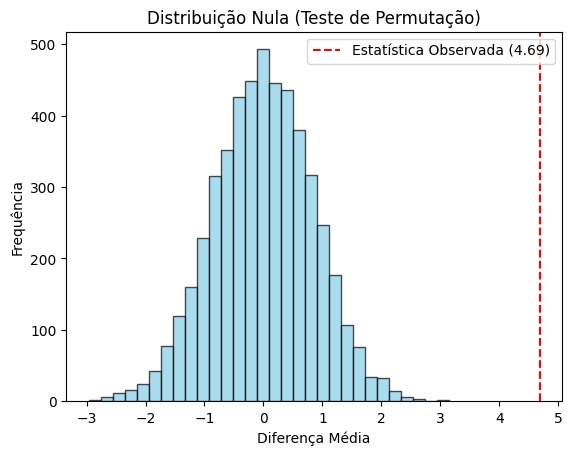

Diferença Observada: 4.69
p-valor: 0.0000


In [433]:
# Executar o teste de permutação
n_permutacoes = 5000
estatisticas = teste_permutacao(controle, tratamento, n_permutacoes)

p_valor = np.sum(np.abs(estatisticas) >= np.abs(dif_observada)) / len(estatisticas)

# Visualização
plt.hist(estatisticas, bins=30, alpha=0.7, color="skyblue", edgecolor="black")
plt.axvline(dif_observada, color="red", linestyle="--", label=f"Estatística Observada ({dif_observada:.2f})")
plt.title("Distribuição Nula (Teste de Permutação)")
plt.xlabel("Diferença Média")
plt.ylabel("Frequência")
plt.legend()
plt.show()


print(f"Diferença Observada: {dif_observada:.2f}")
print(f"p-valor: {p_valor:.4f}")

In [434]:
# Intervalos de Confiança

IC_controle_min = np.mean(controle) - 2 * np.std(controle) / np.sqrt(len(controle))
IC_controle_max = np.mean(controle) + 2 * np.std(controle) / np.sqrt(len(controle))

IC_tratamento_min = np.mean(tratamento) - 2 * np.std(tratamento) / np.sqrt(len(tratamento))
IC_tratamento_max = np.mean(tratamento) + 2 * np.std(tratamento) / np.sqrt(len(tratamento))

print(f"Intervalo Confiança Controle: [{np.round(IC_controle_min, 1)} até {np.round(IC_controle_max, 1)}]")
print(f"Intervalo Confiança Tratamento: [{np.round(IC_tratamento_min, 1)} até {np.round(IC_tratamento_max, 1)}]")

Intervalo Confiança Controle: [48.8 até 51.2]
Intervalo Confiança Tratamento: [53.5 até 55.9]


# Testes T

### Teste T para Uma Amostra

In [445]:
import numpy as np
from scipy.stats import ttest_1samp

# Gerar dados
np.random.seed(42)
altura_amostra = np.random.normal(172, 6, 100)  # Média 172, DP 6

# Teste t
t_stat, p_val = ttest_1samp(altura_amostra, 170)

print(f"Estatística t: {t_stat:.2f}")
print(f"P-valor: {p_val:.4f}")

# Interpretação
if p_val < 0.05:
    print("Rejeitamos H0: A média da amostra é significativamente diferente de 170 cm.")
else:
    print("Não rejeitamos H0: Não há evidências suficientes para dizer que a média é diferente de 170 cm.")

Estatística t: 2.53
P-valor: 0.0131
Rejeitamos H0: A média da amostra é significativamente diferente de 170 cm.


### Teste T Para Duas Amostras

In [448]:
from scipy.stats import ttest_ind

# Gerar dados
altura_homens = np.random.normal(175, 10, 10)  # Homens: Média 175, DP 5
altura_mulheres = np.random.normal(165, 10, 10)  # Mulheres: Média 165, DP 5

# Teste t
t_stat, p_val = ttest_ind(altura_homens, altura_mulheres)

print(f"Estatística t: {t_stat:.2f}")
print(f"P-valor: {p_val:.4f}")

# Interpretação
if p_val < 0.05:
    print("Rejeitamos H0: As médias de altura entre homens e mulheres são significativamente diferentes.")
else:
    print("Não rejeitamos H0: Não há evidências suficientes para afirmar que as médias são diferentes.")



Estatística t: 2.84
P-valor: 0.0108
Rejeitamos H0: As médias de altura entre homens e mulheres são significativamente diferentes.


# ANOVA

Número total de comparações: 6
Número de comparações significativas: 1
Porcentagem de comparações significativas (falsos positivos): 16.67%


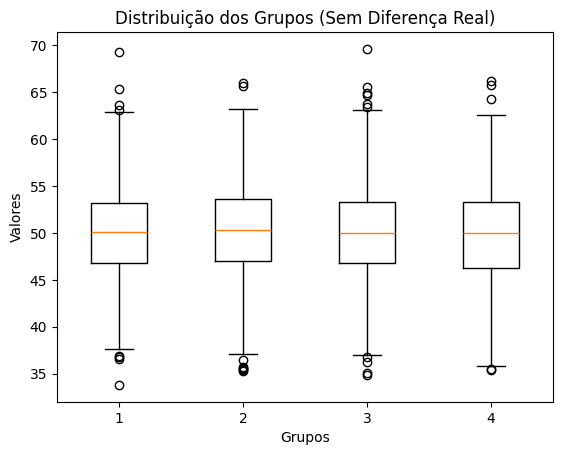

In [449]:
import numpy as np
from scipy.stats import ttest_ind
import itertools

# Parâmetros da simulação
np.random.seed(42)
num_grupos = 4  # Número de grupos
tamanho_amostra = 1000  # Tamanho da amostra por grupo
media = 50  # Média verdadeira (igual para todos os grupos)
desvio_padrao = 5  # Desvio padrão verdadeiro
alpha = 0.05  # Nível de significância

# Gerar dados simulados
grupos = [np.random.normal(media, desvio_padrao, tamanho_amostra) for _ in range(num_grupos)]

# Realizar todas as comparações entre pares de grupos
pares = list(itertools.combinations(range(num_grupos), 2))
resultados_significativos = 0

for (i, j) in pares:
    _, p_valor = ttest_ind(grupos[i], grupos[j])  # Teste t para dois grupos
    if p_valor < alpha:
        resultados_significativos += 1

# Cálculo da porcentagem de comparações significativas
total_comparacoes = len(pares)
percentual_significativo = (resultados_significativos / total_comparacoes) * 100

print(f"Número total de comparações: {total_comparacoes}")
print(f"Número de comparações significativas: {resultados_significativos}")
print(f"Porcentagem de comparações significativas (falsos positivos): {percentual_significativo:.2f}%")

# Visualização
import matplotlib.pyplot as plt

# Distribuição dos dados
plt.boxplot(grupos)
plt.title("Distribuição dos Grupos (Sem Diferença Real)")
plt.xlabel("Grupos")
plt.ylabel("Valores")
plt.show()


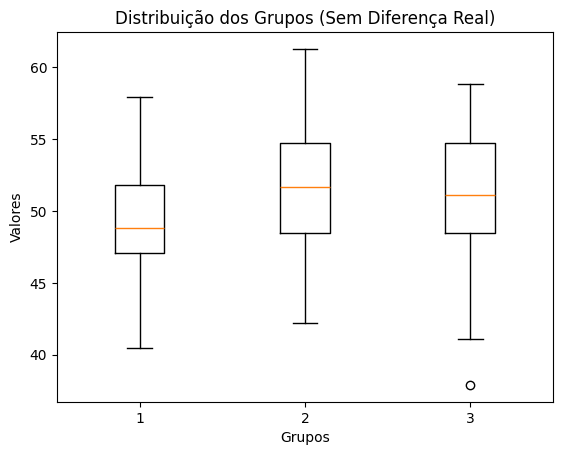

In [453]:
import numpy as np
import matplotlib.pyplot as plt

# Dados simulados
np.random.seed(42)
grupo_1 = np.random.normal(50, 5, 30)
grupo_2 = np.random.normal(52, 5, 30)
grupo_3 = np.random.normal(51, 5, 30)

# Combinar dados e rótulos
dados = np.concatenate([grupo_1, grupo_2, grupo_3])
grupos = np.array(["Grupo 1"] * len(grupo_1) + 
                  ["Grupo 2"] * len(grupo_2) + 
                  ["Grupo 3"] * len(grupo_3))


# Distribuição dos dados
plt.boxplot([grupo_1, grupo_2, grupo_3])
plt.title("Distribuição dos Grupos (Sem Diferença Real)")
plt.xlabel("Grupos")
plt.ylabel("Valores")
plt.show()

P-valor empírico: 0.1350


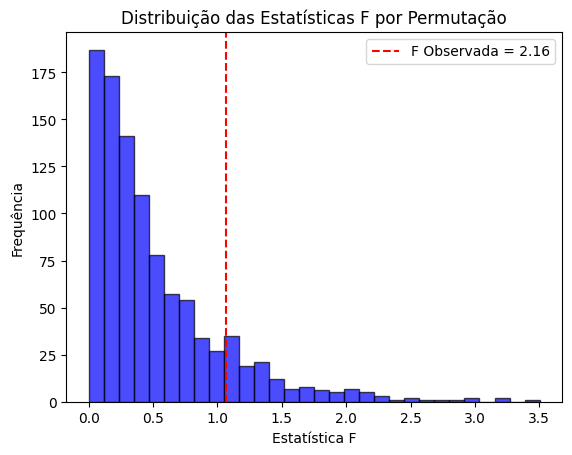

In [454]:
# Permutação
n_permutacoes = 1000
f_permutadas = []
variances = []

for _ in range(n_permutacoes):
    # Permutar os rótulos
    grupos_permutados = np.random.permutation(grupos)
    # Separar dados permutados por grupo
    dados_permutados = [np.mean(dados[grupos_permutados == grupo]) for grupo in np.unique(grupos)]
    # Calcular F para os dados permutados
    variances.append(np.var(dados_permutados))

real_variance = np.var([np.mean(grupo_1), np.mean(grupo_2), np.mean(grupo_3)])

# Calcular p-valor empírico
p_valor_empirico = np.mean(variances >= real_variance)
print(f"P-valor empírico: {p_valor_empirico:.4f}")

# Visualização
plt.hist(variances, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(real_variance, color='red', linestyle='--', label=f'F Observada = {f_obs:.2f}')
plt.title("Distribuição das Estatísticas F por Permutação")
plt.xlabel("Estatística F")
plt.ylabel("Frequência")
plt.legend()
plt.show()
